In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [84]:
data_listings = pd.read_csv('Airbnb Data/Listings.csv')
print(data_listings.head(10))

   listing_id                                               name   host_id  \
0      281420     Beautiful Flat in le Village Montmartre, Paris   1466919   
1     3705183                         39 mÂ² Paris (Sacre CÅ“ur)  10328771   
2     4082273                Lovely apartment with Terrace, 60m2  19252768   
3     4797344                Cosy studio (close to Eiffel tower)  10668311   
4     4823489   Close to Eiffel Tower - Beautiful flat : 2 rooms  24837558   
5     4898654                 NEW - Charming apartment Le Marais    505535   
6     6021700                  2P - Entre Bastille et Republique   8053690   
7     6945740               57sqm btw. Bastille & PÃ¨re Lachaise   5924709   
8     7491966  Charming appartment near the Parc Buttes Chaumont  35812762   
9     7849932                  Bel appartement plein de charme !  20833291   

   host_since                 host_location host_response_time  \
0  2011-12-03  Paris, Ile-de-France, France                NaN   
1  2013-1

/Users/borisescalanteramirez/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Gaining insights on our data

In [19]:
missing_data = data_listings.isna().sum()/len(data_listings)*100
missing_data[missing_data!=0]

name                            0.061677
host_response_time             45.974856
host_response_rate             45.974856
host_acceptance_rate           40.336068
district                       86.769557
bedrooms                       10.520239
review_scores_rating           32.624645
review_scores_accuracy         32.735090
review_scores_cleanliness      32.717878
review_scores_checkin          32.755888
review_scores_communication    32.725767
review_scores_location         32.757322
review_scores_value            32.760908
dtype: float64

In [21]:
data_listings.dtypes

listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                       object
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating     

# Performing EDA

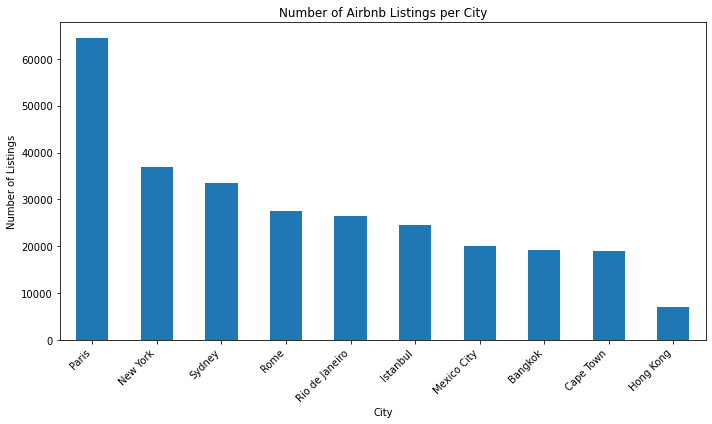

In [17]:
data_listings['city'] = data_listings['city'].str.split(',').str[-1].str.strip()
data_listings.dropna(subset=['city'], inplace=True)
listings_per_country = data_listings['city'].value_counts()


plt.figure(figsize=(10, 6))
listings_per_country.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.title('Number of Airbnb Listings per City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

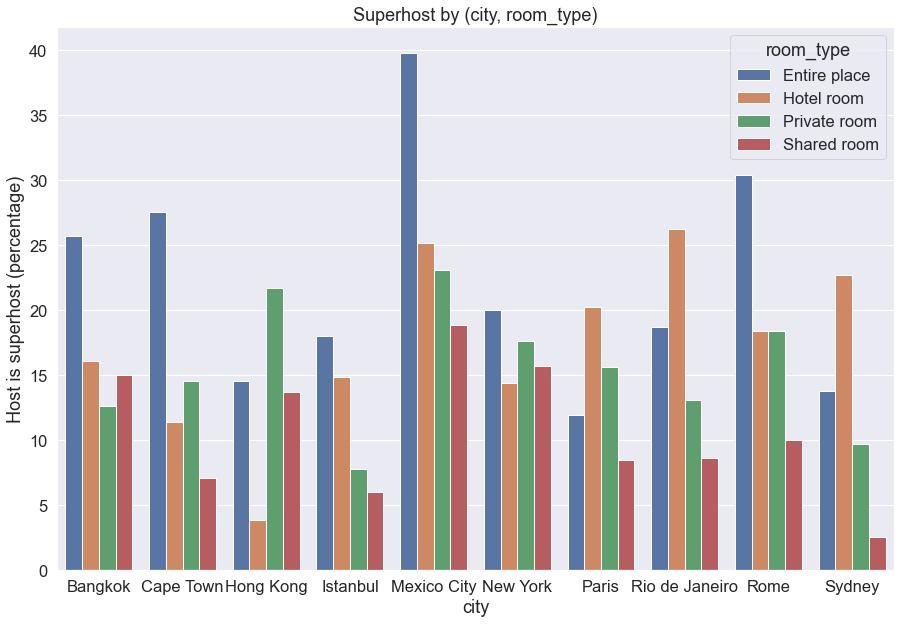

,city,room_type,Host is superhost (percentage)
0,Bangkok,Entire place,25.680128
1,Bangkok,Hotel room,16.078431
2,Bangkok,Private room,12.612613
3,Bangkok,Shared room,15.034483
4,Cape Town,Entire place,27.583039
5,Cape Town,Hotel room,11.437908
6,Cape Town,Private room,14.523651
7,Cape Town,Shared room,7.086614
8,Hong Kong,Entire place,14.561607
9,Hong Kong,Hotel room,3.888889


In [79]:
plt.figure(figsize=(15, 10))
result = data_listings.groupby(["city", "room_type"]).apply(lambda group: (group["host_is_superhost"] == "t").mean() * 100.0)

result = result.reset_index(name="Host is superhost (percentage)")
sns.barplot(x="city", y="Host is superhost (percentage)", hue="room_type", data=result).set_title("Superhost by (city, room_type)")
plt.show()
result.head(100)

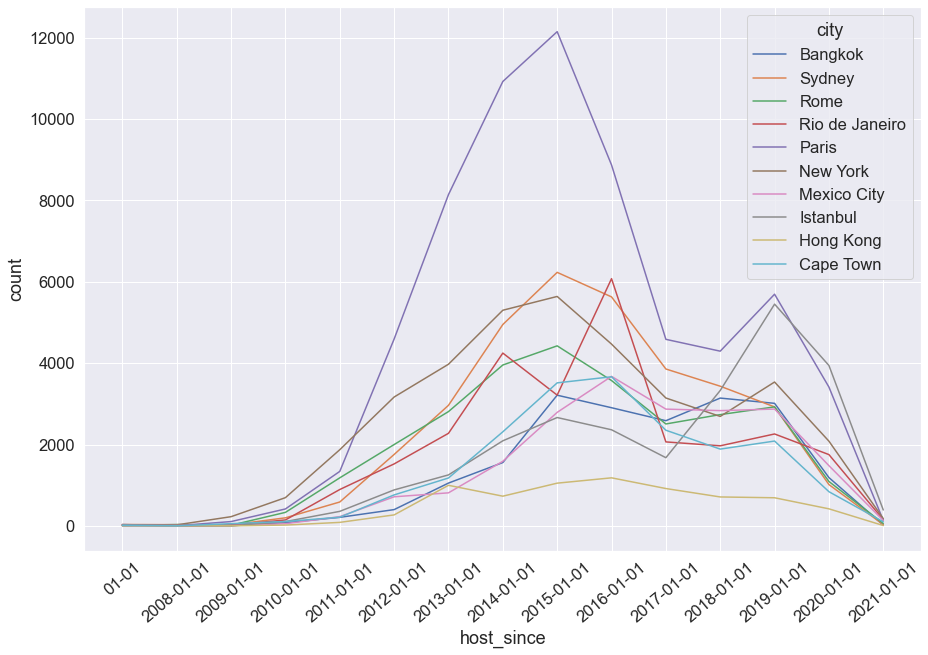

In [97]:
dataframe = data_listings
plt.figure(figsize=(15, 10))
plt.xticks(rotation=40)
dataframe["host_since"] = dataframe["host_since"].apply(lambda x: str(x)[:-5] + "01-01")
dataframe["host_since"] = pd.to_datetime(dataframe["host_since"], yearfirst=True, errors="ignore")
hosts_since = data_listings.groupby(["city", "host_since"]).size().reset_index()
hosts_since = hosts_since.sort_values(by = "host_since")
hosts_since.rename({0: "count"}, inplace = True, axis = 1)
sns.lineplot(x = "host_since", y = "count", hue = "city", data = hosts_since)
plt.show()

# Analysis

In [110]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/borisescalanteramirez/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Word frequency

In [130]:
df = data_listings

df.dropna(subset=['name'], inplace=True)
descriptions = df['name']


tokens = [word_tokenize(description.lower())for description in descriptions]

stop_words = set(stopwords.words('english'))
filtered_tokens = [[word for word in token if word.isalnum() and word not in stop_words] for token in tokens]

all_words = [word for sublist in filtered_tokens for word in sublist]

word_freq = Counter(all_words)
word_freq_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['frequency'])
word_freq_df.index.name = 'word'
word_freq_df.sort_values(by='frequency', ascending=False, inplace=True)


In [131]:
print(word_freq_df.head(20))


             frequency
word                  
apartment        33618
room             33487
studio           21367
2                16831
paris            16147
de               15984
bedroom          14558
private          14092
near             13565
flat             11732
cozy             10772
home              9953
appartement       9866
1                 9432
house             9293
beach             9038
cosy              8939
apt               8155
heart             7996
view              7681


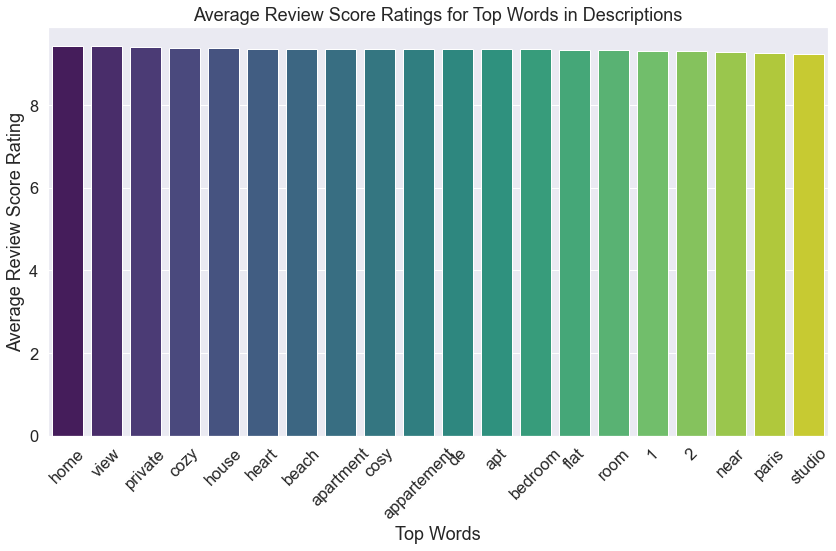

In [141]:
top_words = word_freq_df.head(20).index.tolist()
df['tokenized_description'] = filtered_tokens 
# Step 2: Create a new DataFrame with relevant columns
data = df[['tokenized_description', 'review_scores_value']]

# Step 3: Calculate average ratings for each word
word_ratings = {}
for word in top_words:
    # Filter rows where the word appears in the tokenized description
    word_rows = data[data['tokenized_description'].apply(lambda x: word in x)]
    # Calculate average rating for rows containing the word
    avg_rating = word_rows['review_scores_value'].mean()
    word_ratings[word] = avg_rating

# Step 4: Visualize the relationship between top words and review scores ratings
word_ratings_df = pd.DataFrame.from_dict(word_ratings, orient='index', columns=['avg_rating'])
word_ratings_df.sort_values(by='avg_rating', ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=word_ratings_df.index, y='avg_rating', data=word_ratings_df, palette='viridis')
plt.xlabel('Top Words')
plt.ylabel('Average Review Score Rating')
plt.title('Average Review Score Ratings for Top Words in Descriptions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [162]:
paris_data = data_listings[data_listings['city'] == 'Paris']

# Perform correlation analysis
correlation = paris_data['bedrooms'].corr(paris_data['price'])

print("Correlation coefficient between number of bedrooms and price:", correlation)

Correlation coefficient between number of bedrooms and price: 0.20574653991340924


In [169]:
from scipy.stats import pearsonr

# Filter data for places in Paris
paris_data = df[df['city'] == 'Paris']
paris_data.dropna(subset=['price'], inplace=True)
paris_data.dropna(subset=['bedrooms'], inplace=True)
# Calculate Pearson correlation coefficient and p-value
corr_coef, p_value = pearsonr(paris_data['bedrooms'], paris_data['price'])

# Define significance level (alpha)
alpha = 0.05

# Print results
print("Pearson correlation coefficient:", corr_coef)
print("P-value:", p_value)

# Perform hypothesis test
if p_value < alpha:
    print("Reject the null hypothesis. There is significant evidence of correlation between number of bedrooms and prices.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence of correlation between number of bedrooms and prices.")


<ipython-input-169-ce1b54dfb1e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paris_data.dropna(subset=['price'], inplace=True)
<ipython-input-169-ce1b54dfb1e5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paris_data.dropna(subset=['bedrooms'], inplace=True)


Pearson correlation coefficient: 0.20574653991340952
P-value: 0.0
Reject the null hypothesis. There is significant evidence of correlation between number of bedrooms and prices.


In [188]:
rome_data = df[df['city'] == 'Rome']
rome_data.dropna(subset=['price'], inplace=True)
rome_data.dropna(subset=['bedrooms'], inplace=True)
# Calculate Pearson correlation coefficient and p-value
corr_coef, p_value = pearsonr(rome_data['bedrooms'], rome_data['price'])

# Define significance level (alpha)
alpha = 0.05

# Print results
print("Pearson correlation coefficient:", corr_coef)
print("P-value:", p_value)

# Perform hypothesis test
if p_value < alpha:
    print("Reject the null hypothesis. There is significant evidence of correlation between number of bedrooms and prices.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence of correlation between number of bedrooms and prices.")

Pearson correlation coefficient: 0.21895827867847897
P-value: 1.5874525886806125e-218
Reject the null hypothesis. There is significant evidence of correlation between number of bedrooms and prices.


<ipython-input-188-6cc2ae047d29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rome_data.dropna(subset=['price'], inplace=True)
<ipython-input-188-6cc2ae047d29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rome_data.dropna(subset=['bedrooms'], inplace=True)


In [190]:
mexico_data = df[df['city'] == 'Mexico City']
mexico_data.dropna(subset=['price'], inplace=True)
mexico_data.dropna(subset=['bedrooms'], inplace=True)
# Calculate Pearson correlation coefficient and p-value
corr_coef, p_value = pearsonr(mexico_data['bedrooms'], mexico_data['price'])

# Define significance level (alpha)
alpha = 0.05

# Print results
print("Pearson correlation coefficient:", corr_coef)
print("P-value:", p_value)

# Perform hypothesis test
if p_value < alpha:
    print("Reject the null hypothesis. There is significant evidence of correlation between number of bedrooms and prices.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence of correlation between number of bedrooms and prices.")

Pearson correlation coefficient: 0.1587767439413042
P-value: 3.9151416959154414e-80
Reject the null hypothesis. There is significant evidence of correlation between number of bedrooms and prices.


<ipython-input-190-5e06fd04b247>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mexico_data.dropna(subset=['price'], inplace=True)
<ipython-input-190-5e06fd04b247>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mexico_data.dropna(subset=['bedrooms'], inplace=True)


In [172]:
from scipy.stats import ttest_ind
t, pval = ttest_ind(paris_data['bedrooms'], paris_data['price'])
print(t, pval)
print("P-value:", format(p_value, '.20f'))

-109.34089885522494 0.0
P-value: 0.00000000000000000000


In [175]:
print("Missing values in number_of_bedrooms:", data_listings['bedrooms'].isnull().sum())
print("Missing values in price:", data_listings['price'].isnull().sum())

# Print summary statistics
print("Summary statistics for number_of_bedrooms:")
print(data_listings['number_of_bedrooms'].describe())
print("\nSummary statistics for price:")
print(data_listings['price'].describe())


Missing values in number_of_bedrooms: 0
Missing values in price: 0
Summary statistics for number_of_bedrooms:


KeyError: 'number_of_bedrooms'

In [185]:
column_array = paris_data['bedrooms'].values
column_array_prices = paris_data['price'].values
t, pval = ttest_ind(column_array, column_array_prices)
print(t, pval)
print("P-value:", format(p_value, '.100f'))

for i in range(len(column_array_prices)):
    print(column_array_prices[i], "   " , column_array[i])
    # print("\n")

-109.34089885522494 0.0
P-value: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
53     1.0
120     1.0
89     1.0
58     1.0
60     1.0
95     1.0
80     1.0
59     1.0
80     1.0
90     1.0
60     1.0
80     1.0
61     1.0
145     1.0
35     1.0
39     1.0
55     1.0
55     1.0
57     1.0
55     1.0
51     1.0
80     1.0
70     1.0
90     1.0
89     1.0
42     1.0
35     1.0
60     1.0
50     1.0
70     1.0
50     1.0
100     1.0
109     1.0
68     1.0
75     1.0
65     1.0
100     1.0
40     1.0
80     1.0
109     1.0
91     1.0
40     1.0
60     1.0
60     1.0
119     1.0
52     1.0
70     1.0
70     1.0
30     1.0
55     1.0
51     1.0
200     1.0
50     1.0
90     1.0
59     1.0
70     1.0
60     1.0
82     1.0
52     1.0
50     1.0
50     1.0
45     1.0
90     1.0
100     1.0
50     1.0
100     1.0
90     1.0
110     1.0
90     1.0
90     1.0
120     1.0
120     1.0
110     1.0
60     1.0
120     1.0
115     1.0
65     1.0
8

In [179]:
# df['review_scores_rating'].mean()
# df['review_scores_location'].head(100)
# df.dropna(subset=['review_scores_rating'], inplace=True)
# print(sum(df['review_scores_rating'])/ len(df['review_scores_rating']))
paris_data['price'].head(100)

0      53
1     120
2      89
3      58
4      60
     ... 
95     80
96    110
97    120
98     75
99    300
Name: price, Length: 100, dtype: int64

## No le hagan caso a esto de abajo

In [76]:

data_listings['host_is_superhost'] = data_listings['host_is_superhost'].map({'t': 1, 'f': 0})

# Calculate the mean of 'host_is_superhost' for each city and profile picture combination
result = data_listings.groupby(["city", "host_has_profile_pic"])['host_is_superhost'].mean().reset_index()

# Pivot the DataFrame to have cities as rows and host_has_profile_pic as columns
pivot_result = result.pivot(index='city', columns='host_has_profile_pic', values='host_is_superhost')

# Calculate the correlation coefficient between having a profile picture and being a superhost
correlation = pivot_result.corr().iloc[0, 1]

print("Correlation coefficient:", correlation)

Correlation coefficient: -0.06562558364470186


In [58]:

paris_data = data_listings[data_listings['city'] == 'Mexico City']
# prueba = paris_data.groupby('host_has_profile_pic').apply(lambda group: (group["host_is_superhost"] == "t").sum())
prueba = paris_data.groupby('host_has_profile_pic')['host_is_superhost'].value_counts(normalize=True).unstack() * 100
second_row_values = prueba.iloc[1]
second_row_values

host_is_superhost
f    68.032048
t    31.967952
Name: t, dtype: float64